# Neural Network
###  forwardPropagation
solo debemos multiplicar los pesos $W$ por el input sumar b ,pasar esta suma ponderada por la funcion de activacion e ir avanzando capa por capa
### backward Propagation
sea la siguiente composicion de funciones:
$$C(a(z^{L}))$$
donde $C$ es la funcion conste definida como:
$$C(a_{j}^{L})=\frac{1}{2}\sum_{j}^{}(y_{i}-a_{j}^{L})^{2}$$
$a$ la funcion de activacion:
$$a^{L}(z^{L})=\frac{1}{1+e^{-z^{L}}}$$
y $z$ la suma ponderada:
$$z^{L}=\sum_{i}^{}a_{i}^{L-1}w_{i}^{L}+b^{L}$$

#### Como varia el $coste$ ante un cambio del parametro $W$?
el parametro w esta conformado por w y el b
$$\frac{\partial C}{\partial w^{L}}=\frac{\partial C}{\partial a^{L}}*\frac{\partial a^{L}}{\partial z^{L}}*\frac{\partial z^{L}}{\partial w^{L}}$$
$$\frac{\partial C}{\partial b^{L}}=\frac{\partial C}{\partial a^{L}}*\frac{\partial a^{L}}{\partial z^{L}}*\frac{\partial z^{L}}{\partial b^{L}}$$
Ahora resolvemos esas derivadas parciales:
derivada del coste con respecto al la funcion de activacion:
$$\frac{\partial C}{\partial a^{L}}=(a_{j}^{L}-y_{j})$$
derivada de la funcion de activacion con respecto a la suma ponderada:
$$\frac{\partial a^{L}}{\partial z^{L}}=a^{L}(z^{L})*(1-a^{L}(z^{L}))$$
derivada de la suma ponderada con respecto a w:
$$\frac{\partial z^{L}}{\partial b^{L}}=a_{i}^{L-1}$$
derivada de la suma ponderada con respecto a b:
$$\frac{\partial z^{L}}{\partial w^{L}}=1$$

### Algoritmo de Backpropagation
1. Computo del error de la ultima capa
    $$\delta^{L}=\frac{\partial C}{\partial a^{L}}*\frac{\partial a^{L}}{\partial z^{L}}$$
2. Retropropagamos el error a la capa anterior
    $$\delta^{L-1}=W^{L}*\delta^{L}*\frac{\partial a^{L-1}}{\partial z^{L-1}}$$
3. calculamos las derivadas de la capa usando el error
    $$\frac{\partial C}{\partial b^{L-1}}=\delta^{L-1}$$
    $$\frac{\partial C}{\partial w^{L-1}}=\delta^{L-1}*a^{L-2}$$

In [83]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
import time
from IPython.display import clear_output
%matplotlib inline
class ReadData(object):
    def __init__(self,datasetName='Iris.csv'):
        self.datasetName=datasetName
    def readData(self):
        df = pd.read_csv('Iris.csv')   
        df = df.drop(['Id'],axis=1)
        rows = list(range(100,150))
        df = df.drop(df.index[rows]) 

        Y = []
        target = df['Species']
        for val in target:
            if(val == 'Iris-setosa'):
                Y.append(0)
            else:
                Y.append(1)
        df = df.drop(['Species'],axis=1)
        X = df.values.tolist()
        X, Y = shuffle(X,Y)
        X=np.array(X)
        Y=np.array(Y)
        forTestY=Y[70:]
        Y=Y[:,np.newaxis]
        forTestX=X[70:,:]
        X=X[0:70,:]
        Y=Y[0:70,:]
        return X,Y,forTestX,forTestY
r=ReadData()
[X,Y,forTestX,forTestY]=r.readData()


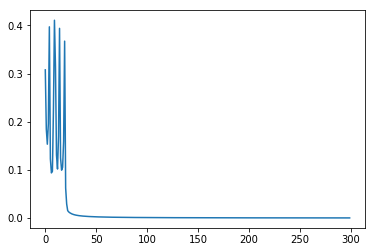

[[13, 0], [0, 17]]


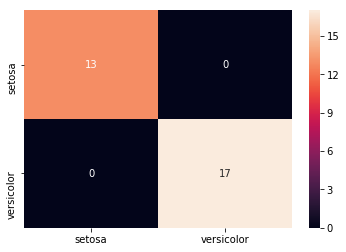

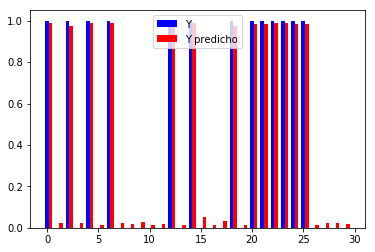

In [108]:

class NeuralLayer(object):#clase capa neuronal
    def __init__(self,numberConections,numberNeurons,activationFunction):
        self.numberConections=numberConections
        self.numberNeurons=numberNeurons
        self.activationFunction=activationFunction
        self.bayas=np.random.rand(1,numberNeurons)*2-1#inicializacion con random
        self.W=np.random.rand(numberConections,numberNeurons)*2-1#inicializacion con random    
class NeuralNetwork:
    def __init__(self,learningRatio=0.01,train=True,numIterations=1000,topology=[4,3,1]):
        self.learningRatio=learningRatio
        self.train=train
        self.numIterations=numIterations
        self.topology=topology
        self.neuralNetwork=self.createNeuralNetwork()
    def createNeuralNetwork(self):
        nn=[]
        for i,layer in enumerate(self.topology[:-1]):#itera hasta len(topology)-1
            nn.append(NeuralLayer(self.topology[i],self.topology[i+1],self.sigmoide))#crea un objeto neuralLayer
        return nn
    sigmoide=(lambda x:1/(1+np.e**(-x)),lambda x:x*(1-x)) #funcion de activacion mas su rerivada
    costFunction=(lambda yp,yr:np.mean((yp-yr)**2),
                 lambda yp,yr:(yp-yr))#funcion de costo mas su rerivada
    def forwardPropagation(self,X,Y):
        out=[(None,X)]#tupla None,X 
        for i,layer in enumerate(self.neuralNetwork):
            z=out[-1][1]@self.neuralNetwork[i].W+self.neuralNetwork[i].bayas
            a=self.neuralNetwork[i].activationFunction[0](z)
            out.append((z,a))#se agrega una nueva tupla confotmado de (z,a) donde z es la suma ponderada
                             #y a es resultado de pasar z como parametro por la funcion de activacion   
        return out 
    def backPropagation(self,X,Y):
        out=self.forwardPropagation(X,Y)
        if self.train:
            deltas=[]
            for i in reversed(range(0, len(self.neuralNetwork))):
                a=out[i+1][1]
                z=out[i+1][0]
                if i==len(self.neuralNetwork)-1:#para la ultima capa
                    deltas.insert(0,self.costFunction[1](a,Y)*self.neuralNetwork[i].activationFunction[1](a))
                else:#para las demas capas
                    deltas.insert(0, deltas[0] @ _W.T * self.neuralNetwork[i].activationFunction[1](a))
                _W=self.neuralNetwork[i].W
                ##desenso del gradiente
                self.neuralNetwork[i].bayas=self.neuralNetwork[i].bayas-np.mean(deltas[0],axis=0,keepdims=True)*self.learningRatio
                self.neuralNetwork[i].W=self.neuralNetwork[i].W-out[i][1].T@deltas[0]*self.learningRatio
        return out[-1][1]
    def fit(self,X,Y):
        loss=[]
        for i in range(self.numIterations):
            out=self.backPropagation(X,Y)
            loss.append(self.costFunction[0](out,Y))
            clear_output(wait=True)
            plt.plot(range(len(loss)), loss)
            plt.show()

    def predict(self,X,Y):
        confusionMatrix=[[0,0],[0,0]]
        outPut=[]
        for i in range(X.shape[0]):
            out=self.forwardPropagation(X[i:i+1,:],Y[i])
            outPut.append(out[-1][1])
            outPut[i]=outPut[i].flatten()
            outPut[i]=np.asscalar(outPut[i])
            if outPut[i]>0.5 and Y[i]==1:
                confusionMatrix[0][0]=confusionMatrix[0][0]+1
            elif outPut[i]<=0.5 and Y[i]==1:
                confusionMatrix[0][1]=confusionMatrix[0][1]+1
            elif outPut[i]<=0.5 and Y[i]==0:
                confusionMatrix[1][1]=confusionMatrix[1][1]+1
            elif outPut[i]>0.5 and Y[i]==0:
                confusionMatrix[1][0]=confusionMatrix[1][0]+1
            #print("salida ",outPut[i],"salida deseada",Y[i])
        print(confusionMatrix)
        cm_df = pd.DataFrame(confusionMatrix,
                     index = ['setosa','versicolor'], 
                     columns = ['setosa','versicolor'])
        sns.heatmap(cm_df, annot=True)
        plt.show()
        N = len(Y)
        x = range(N)
        xx=np.array(x)
        xx=xx+0.35
        width = 1/1.5
        plt.bar(x,Y,width=0.35, color="blue")
        plt.bar(xx,outPut,width=0.35, color="red")     
        plt.legend(["Y","Y predicho"])
if __name__=='__main__':
    nn1=NeuralNetwork(learningRatio=0.105,topology=[4,12,1],numIterations=300)
    nn1.fit(X,Y)
    nn1.predict(forTestX,forTestY)